In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
import pandas as pd
from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
model=load_model('cnn_Open20.hdf5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 564, 564, 96)      2688      
                                                                 
 activation (Activation)     (None, 564, 564, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 282, 282, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 32)      27680     
                                                                 
 activation_1 (Activation)   (None, 280, 280, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 140, 140, 32)     0         
 2D)                                                    

<function matplotlib.pyplot.show(close=None, block=None)>

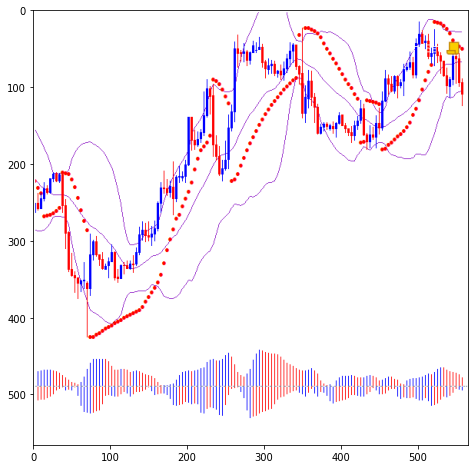

In [4]:
img_path='Train/Buy/Buy48.png'
img=image.load_img(img_path,target_size=(566,566))
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show

In [5]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
#images=np.vstack([x])
#x=preprocess_input(x)
images = x/255

In [6]:
# Crop the model on some convolutional layer. Convolutional layer numbers are 0, 3, 6. Start from zero. In fact, we create a new already trained model, from which we will receive an intermediate result before classification.
model=Model(inputs=model.input, outputs=model.layers[0].output)
# model=Model(inputs=model.input, outputs=model.layers[3].output)
# model=Model(inputs=model.input, outputs=model.layers[6].output)


IndentationError: unexpected indent (Temp/ipykernel_25840/3615719889.py, line 2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 564, 564, 96)      2688      
                                                                 
 activation (Activation)     (None, 564, 564, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 282, 282, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 32)      27680     
                                                                 
 activation_1 (Activation)   (None, 280, 280, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 140, 140, 32)     0         
 2D)                                                    

In [ ]:
model=model.predict(images, verbose=1)
#model = (model.predict(images) > 0.5).astype("int32")
#classes_x=np.argmax(model,axis=1)
#print(classes_x)
print(model)

1/1 [==============================] - 17s 17s/step
[[0.20186837]]


In [ ]:
print(model.shape)
# numpy special list slicing for 2d array : https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/
# In linear algebra terms, m[:,n] is taking the nth column vector of the matrix m
# 95 refers to  conv2d (Conv2D)  (None, 564, 564, 96) in conv layer 0
im=model[0,:,:,15]
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()

(1, 1)


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [ ]:
rows=12
filters=model.shape[-1]
size=model.shape[1]
cols=filters//rows
display_grid=np.zeros((cols*size,rows*size))
for col in range(cols):
    for row in range(rows):
        channel_image=model[0,:,:,col*rows+row]
        channel_image-=channel_image.mean()
        channel_image/=channel_image.std()
        channel_image*=64
        channel_image+=128
        channel_image=np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
scale=1./size
plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[1]))
plt.grid(False)
plt.imshow(display_grid,aspect='auto',cmap='viridis')

In [ ]:

print(model.shape)
im=model[0,:,:,5]
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()